In [1]:
import pandas as pd

messages=pd.read_csv("SMSSpamCollection", sep='\t', names=["label","message"])

# Tokenization of paragraphs/sentences
import nltk

In [2]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
#Cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from nltk.stem import WordNetLemmatizer

ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages["message"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in set(stopwords.words("English"))]
    review=' '.join(review)
    corpus.append(review)


In [4]:
# Creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=2500) # out of 6296, we will take top 2500 frequent
X=cv.fit_transform(corpus).toarray()

y=pd.get_dummies(messages["label"])
y=y.iloc[:,1].values


In [5]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=.2, random_state=0)

In [53]:
# training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spm_model=MultinomialNB().fit(X_train,y_train)

y_pred=spm_model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

conf=confusion_matrix(y_test,y_pred)

In [45]:
print(conf)

[[945  10]
 [  8 152]]


In [9]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,y_pred)

In [10]:
print(acc)

0.9838565022421525


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.95      0.94       160

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
a = pd.DataFrame(y_test)


In [17]:
print(a[0].value_counts())

0    955
1    160
Name: 0, dtype: int64


In [19]:
from sklearn.metrics import plot_confusion_matrix

<IPython.core.display.Javascript object>

Confusion matrix, without normalization
[[945  10]
 [  8 152]]


<IPython.core.display.Javascript object>

Normalized confusion matrix
[[0.9895288 0.0104712]
 [0.05      0.95     ]]


<IPython.core.display.Javascript object>

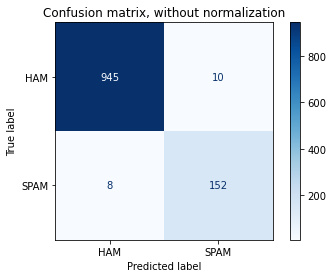

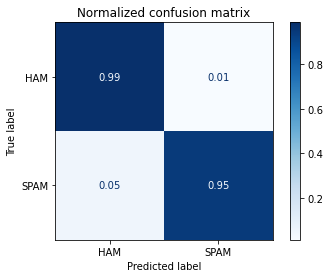

In [23]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(spm_model, X_test, y_test,
                                 display_labels=["HAM","SPAM"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [59]:
ytrain_pred = spm_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = spm_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9931216407168232
RF test roc-auc: 0.990196335078534


In [60]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [61]:
y_pred1=pd.Series(spm_model.predict_proba(X_test)[:,1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

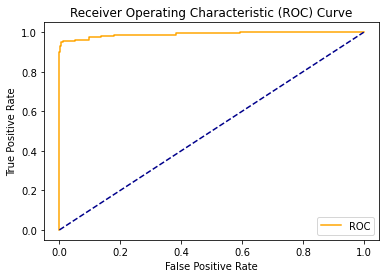

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
thresholds

plot_roc_curve(fpr,tpr)

In [63]:
predict_mine = np.where(ytest_pred > 0.21, 1, 0)

<IPython.core.display.Javascript object>

In [64]:
predict_mine

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [65]:
spm_model.predict_proba(X_test)[:,1]

array([1.04933454e-08, 9.63269010e-01, 7.10909147e-04, ...,
       1.34598714e-03, 1.00000000e+00, 1.31702939e-01])

In [128]:
predict_mine = np.where(pd.Series(predict_probabilities[:,1]) > 0.2, 1, 0)

<IPython.core.display.Javascript object>

In [129]:
print(confusion_matrix(y_test,predict_mine))

[[917  38]
 [  7 153]]


<IPython.core.display.Javascript object>

Confusion matrix, without normalization
[[945  10]
 [  8 152]]


<IPython.core.display.Javascript object>

Normalized confusion matrix
[[0.9895288 0.0104712]
 [0.05      0.95     ]]


<IPython.core.display.Javascript object>

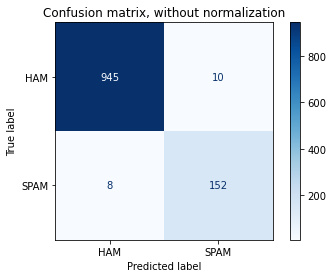

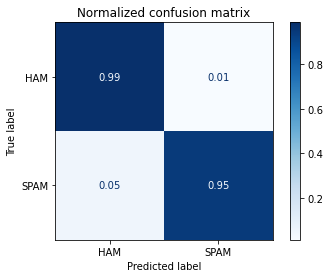

In [103]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(spm_model, X_test, y_test,
                                 display_labels=["HAM","SPAM"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

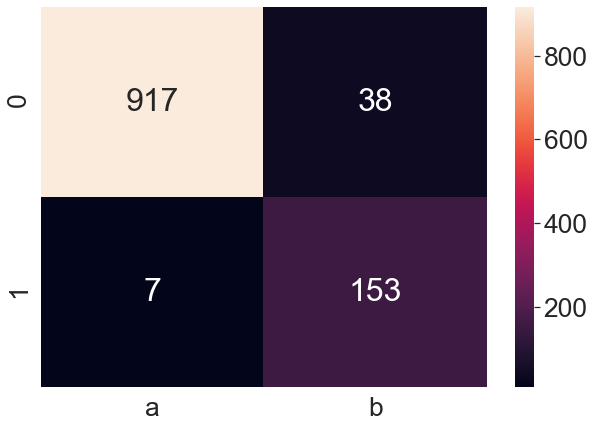

In [132]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = confusion_matrix(y_test,predict_mine)

df_cm = pd.DataFrame(array, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=2.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 32}, fmt='g', xticklabels=["a","b"]) # font size
plt.show()